In [66]:
import fastf1 as ff1
import numpy as np
import matplotlib as mpl
import pandas as pd
import os

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

In [67]:
# Enable the cache
ff1.Cache.enable_cache('cache/') 

In [68]:
year = 2021
track = 'FRANCE'
session = 'Q'

In [69]:
session = ff1.get_session(2021, 'FRANCE', 'Q')
weekend = session.event
session.load()
lap = session.laps.pick_fastest()

# Get telemetry data
x = lap.telemetry['X']              # values for x-axis
y = lap.telemetry['Y']              # values for y-axis
color = lap.telemetry['Speed']      # value to base color gradient on

core           INFO 	Loading data for French Grand Prix - Qualifying [v2.2.9]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
/Users/davidshortland/Library/Python/3.8/lib/python/site-packages/fastf1/core.py:1310: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_last).reset_index(drop=True)
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '44', '7

In [70]:
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

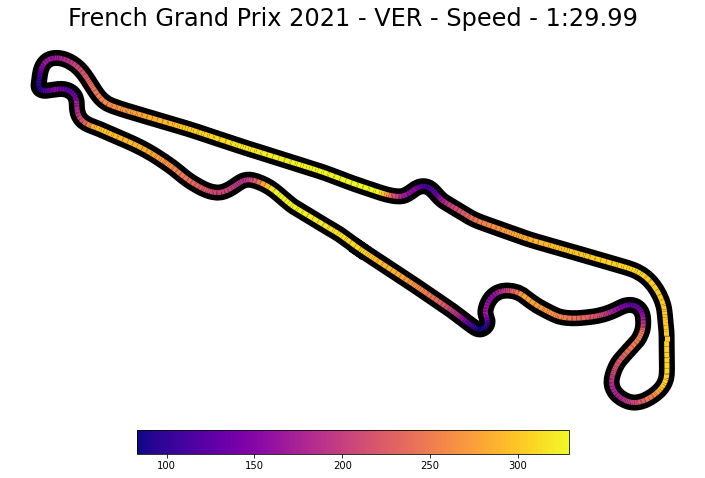

In [80]:
# We create a plot with title and adjust some setting to make it look good.
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))

# Calculate better formatted time
days = lap.LapTime.days
hours, remainder = divmod(lap.LapTime.seconds, 3600)
minutes, seconds = divmod(remainder, 60)
seconds += lap.LapTime.microseconds / 1e6

fig.patch.set_facecolor("white")
fig.suptitle(f'{weekend.EventName} 2021 - {lap.Driver} - Speed - {minutes}:{seconds}', size=24, y=0.97, color='black')

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')
ax.set_facecolor("white")


# After this, we plot the data itself.
# Create background track line
ax.plot(lap.telemetry['X'], lap.telemetry['Y'], color='black', linestyle='-', linewidth=16, zorder=0)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=mpl.cm.plasma, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(color)

# Merge all line segments together
line = ax.add_collection(lc)


# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=mpl.cm.plasma, orientation="horizontal")

# Show the plot
dire = "./brief-graphics/" + track + str(year)
if not os.path.exists(dire):
    os.makedirs(dire)
plt.savefig(dire+"/SpeedGraph.png", facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()